In [26]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


### Import dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Define class names.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Check dataset. 

train_images.shape:  (60000, 28, 28)
train_labels      :  60000
train_labels      :  [9 0 0 ... 3 0 5]
test_images.shape :  (10000, 28, 28)
test_labels       :  10000


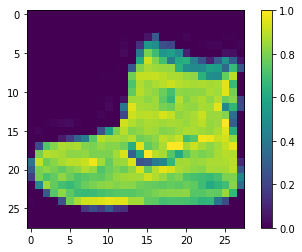

In [32]:
print("train_images.shape: ", train_images.shape)
print("train_labels      : ", len(train_labels))
print("train_labels      : ", train_labels)
print("test_images.shape : ", test_images.shape)
print("test_labels       : ", len(test_labels))

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
# Scaling image value by diviging 255. 
train_images = train_images / 255.0
test_images = test_images / 255.0

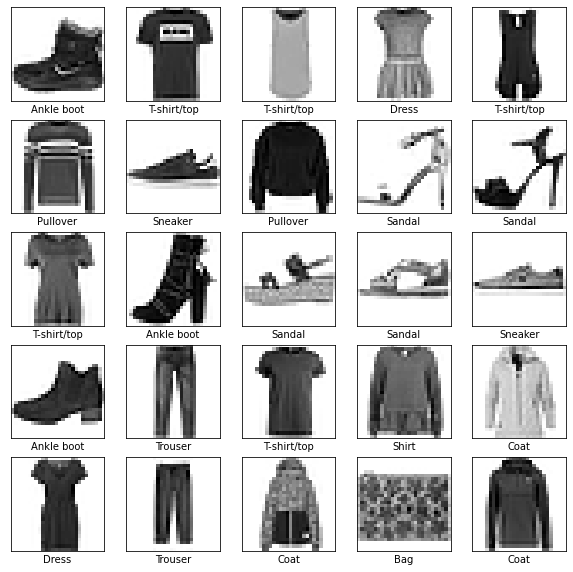

In [11]:
# Display images in training dataset. 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
# Modeling.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
# Configuration of the model. 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# Training with train_images, train_labels. 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3062 - accuracy: 0.1001
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3066 - accuracy: 0.1003
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3063 - accuracy: 0.0981
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3059 - accuracy: 0.0995
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3056 - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3057 - accuracy: 0.0997
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3061 - accuracy: 0.0995
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3056 - accuracy: 0.1023
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3060 - accuracy: 0.0969
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.305

### evalute()

evalute() method is to evalute the performance of the model. It returns loss and metrics values of the model.

[evaluate](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)

In [48]:
# Evaluate the model with test data. 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Test accuracy: ", test_acc)
print("Test loss    : ", test_loss)

313/313 - 0s - loss: 2.3074 - accuracy: 0.1000
Test accuracy:  0.10000000149011612
Test loss    :  2.307368278503418


### Creating prediction model. 

Creating prediction model with softmax and logits that is a function which oeperates on the unscaled output of ealier layers and on a linear scal to understand the linear units. Logits typically become an input to the softmax function. 

[logits](https://developers.google.com/machine-learning/glossary#logits)

In [52]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

### Check the prediction. 

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [54]:
print("predictions[0]    : ", predictions[0])
print("Highest Confidenct: ", np.argmax(predictions[0]))
print("test_labels[0]    : ", test_labels[0])

predictions[0]    :  [0.09418007 0.12284642 0.09808299 0.10636583 0.10131143 0.09617495
 0.10401122 0.08536084 0.08845168 0.10321454]
Highest Confidenct:  1
test_labels[0]    :  9


In [55]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

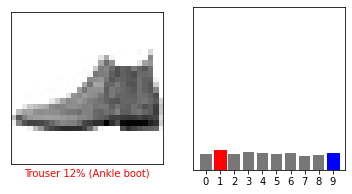

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

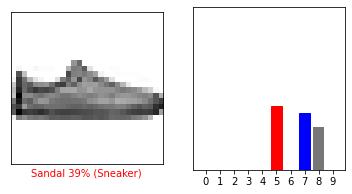

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

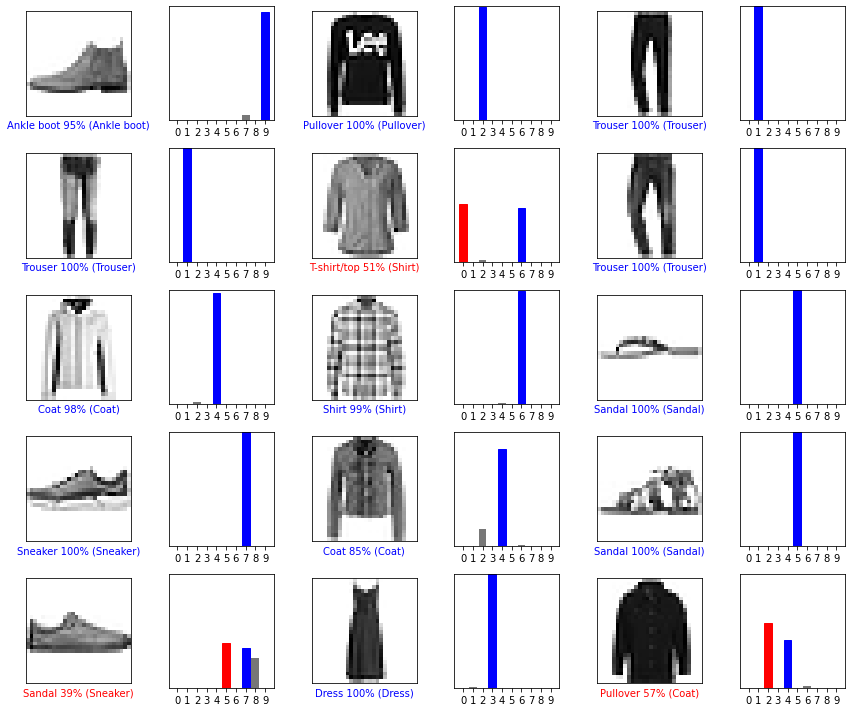

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()